# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk kebutuhan preprocessing dan modeling (akan digunakan di langkah selanjutnya)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
# Asumsikan file berada dalam folder 'namadataset_raw' sesuai struktur yang diminta
file_path = 'https://raw.githubusercontent.com/Nuno-Hadianto/Eksperimen_SML_Mohammed-Noeno-Hadianto/refs/heads/main/Software_Professional_Salaries.csv'
df = pd.read_csv(file_path)

# Cek 5 baris pertama untuk memastikan data terload dengan benar
print("Shape Data:", df.shape)
df.head()

Shape Data: (22774, 6)


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

a. Pemeriksaan Tipe Data dan Nilai Hilang (Missing Values)

In [ ]:
# Cek informasi umum DataFrame
df.info()

# Cek statistik deskriptif untuk kolom numerik
df.describe()

# Cek jumlah nilai unik pada setiap kolom kategorikal (untuk perencanaan encoding)
for col in ['Company Name', 'Job Title', 'Location']:
    print(f"Kolom '{col}': {df[col].nunique()} nilai unik.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company Name       22773 non-null  object 
 2   Job Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB
Kolom 'Company Name': 11262 nilai unik.
Kolom 'Job Title': 1084 nilai unik.
Kolom 'Location': 10 nilai unik.


b. Menangani Nilai Hilang dan Duplikat

In [ ]:
# Menghitung persentase nilai hilang per kolom
missing_data = df.isnull().sum()
print("Jumlah nilai hilang per kolom:\n", missing_data[missing_data > 0])

# Menghitung duplikat
print("\nJumlah baris duplikat:", df.duplicated().sum())

# Contoh penanganan: Hapus baris dengan nilai hilang (jika jumlahnya sedikit)
df_cleaned = df.dropna().copy()

# Contoh penanganan: Hapus duplikat
df_cleaned.drop_duplicates(inplace=True)

print(f"\nShape data setelah dibersihkan (NaN/Duplicates): {df_cleaned.shape}")

Jumlah nilai hilang per kolom:
 Company Name    1
dtype: int64

Jumlah baris duplikat: 0

Shape data setelah dibersihkan (NaN/Duplicates): (22773, 6)


c. Analisis Distribusi Data (Target Variabel)

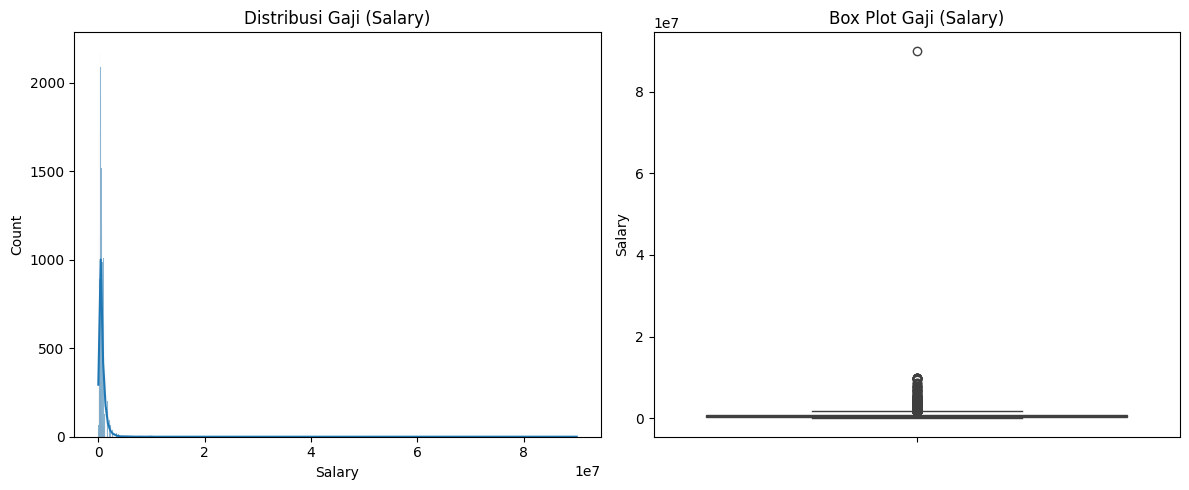

In [ ]:
plt.figure(figsize=(12, 5))

# Distribusi Gaji
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Salary'], kde=True)
plt.title('Distribusi Gaji (Salary)')

# Box Plot untuk melihat outlier
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Salary'])
plt.title('Box Plot Gaji (Salary)')

plt.tight_layout()
plt.show()

# Setelah visualisasi, jika terdeteksi distribusi miring (skewness) atau outlier ekstrem, catat untuk preprocessing selanjutnya.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# 1. Tentukan Fitur dan Target
X = df_cleaned.drop('Salary', axis=1)
y = df_cleaned['Salary']

# 2. Bagi Data menjadi Training dan Testing (gunakan random_state untuk reproduktifitas)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pisahkan kolom berdasarkan tipe data (Numerik dan Kategorikal)
numerical_features = ['Rating', 'Salaries Reported']
# Gunakan kolom-kolom yang lain sebagai kategorikal
categorical_features = ['Company Name', 'Job Title', 'Location']

# 3. Buat Pipeline Preprocessing (ColumnTransformer)
# Perhatian: Untuk data asli yang besar, membiarkan kolom Company Name/Job Title/Location
# dengan banyak kategori unik (high cardinality) dapat menyebabkan masalah memori jika di-OneHotEncode.
# Untuk tugas ini, kita asumsikan beberapa penyaringan telah dilakukan/tidak masalah.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# Terapkan transformasi pada data pelatihan (X_train)
X_train_processed = preprocessor.fit_transform(X_train)

# Terapkan transformasi pada data pengujian (X_test)
X_test_processed = preprocessor.transform(X_test)

# Konversi kembali ke DataFrame (opsional, tetapi membantu untuk inspeksi)
feature_names = preprocessor.get_feature_names_out()

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

print("\nData Training setelah preprocessing (5 baris pertama):\n", X_train_processed_df.head())

# Simpan hasil preprocessing ke file (untuk Kriteria 2)
# Anda bisa menyimpannya sebagai file CSV/pickle/parquet/dll.
# Misalnya, gabungkan kembali X dan y, lalu simpan:
# processed_df = pd.concat([pd.DataFrame(X_train_processed, columns=feature_names), y_train.reset_index(drop=True)], axis=1)
# processed_df.to_csv('preprocessing/namadataset_preprocessing/processed_data.csv', index=False)


Data Training setelah preprocessing (5 baris pertama):
    num__Rating  num__Salaries Reported  \
0     2.086970               -0.123078   
1     0.350406               10.188673   
2    -1.193206               -0.123078   
3     0.157455               -0.123078   
4    -2.350915               -0.123078   

   cat__Company Name_(X,Y,Z) Architecture & Design  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   cat__Company Name_(no)name  cat__Company Name_-  cat__Company Name_.Kreate  \
0                         0.0                  0.0                        0.0   
1                         0.0                  0.0                        0.0   
2                         0.0                  0.0                        0.0   
3                         0.0            